In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
train_dir='C:/Users/jpinf/Downloads/eye/model/data/training'
test_dir='C:/Users/jpinf/Downloads/eye/model/data/testing'


In [3]:
batch_size = 10
epochs = 1
img_height = 224
img_width = 224

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255)  
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1111 images belonging to 5 classes.


In [5]:
val_image_generator = ImageDataGenerator(rescale=1./255)  
val_data_gen = val_image_generator .flow_from_directory(batch_size=batch_size,directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 1111 images belonging to 5 classes.


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [7]:
 base_model = InceptionV3(weights = 'imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [8]:
base_model.trainable = False

In [9]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
cnn_model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(5, activation="softmax")
])

In [11]:
cnn_model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [12]:
history = cnn_model.fit(train_data_gen, epochs=45,
validation_data= val_data_gen,)


Epoch 1/45
112/112 [==============================] - 87s 781ms/step - loss: 1.6071 - accuracy: 0.3078 - val_loss: 1.3578 - val_accuracy: 0.3771
Epoch 2/45
112/112 [==============================] - 90s 807ms/step - loss: 1.3618 - accuracy: 0.3870 - val_loss: 1.2304 - val_accuracy: 0.5005
Epoch 3/45
112/112 [==============================] - 84s 752ms/step - loss: 1.2794 - accuracy: 0.4257 - val_loss: 1.2070 - val_accuracy: 0.4878
Epoch 4/45
112/112 [==============================] - 88s 784ms/step - loss: 1.2298 - accuracy: 0.4536 - val_loss: 1.1460 - val_accuracy: 0.5113
Epoch 5/45
112/112 [==============================] - 83s 745ms/step - loss: 1.1726 - accuracy: 0.4851 - val_loss: 1.1060 - val_accuracy: 0.5248
Epoch 6/45
112/112 [==============================] - 90s 808ms/step - loss: 1.1218 - accuracy: 0.5059 - val_loss: 1.1024 - val_accuracy: 0.5284
Epoch 7/45
112/112 [==============================] - 87s 778ms/step - loss: 1.1145 - accuracy: 0.5320 - val_loss: 1.1217 - val_ac

In [13]:
cnn_model.save('eye.h5')

In [14]:
import numpy as np

In [15]:
y=np.concatenate([val_data_gen.next()[1] for i in range(val_data_gen.__len__())])
true_labels=np.argmax(y, axis=-1)
prediction= cnn_model.predict(val_data_gen, verbose=2)
prediction=np.argmax(prediction, axis=-1)

112/112 - 48s


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true=true_labels, y_pred=prediction)

In [18]:
cm_plot_labels = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']

Confusion matrix, without normalization
[[286   0   0   0   0]
 [ 10 263  13   0   0]
 [  0   0 297   0   0]
 [  0   0   3 140   0]
 [  0   0   0   0  99]]
Accuracy: 0.977
Precision: 0.972
Recall: 0.977
F-Measure: 0.977


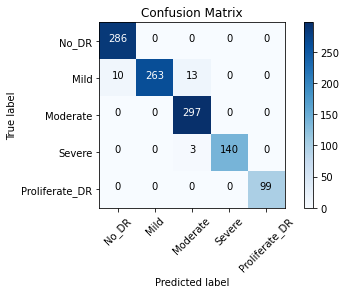

In [19]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
from sklearn.metrics import accuracy_score
acc=accuracy_score(true_labels,prediction) 
print('Accuracy: %.3f' % acc)
from sklearn.metrics import precision_score
precision = precision_score(true_labels,prediction,labels=[1,2], average='micro')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(true_labels,prediction, average='micro')
print('Recall: %.3f' % recall)
from sklearn.metrics import f1_score
score = f1_score(true_labels,prediction, average='micro')
print('F-Measure: %.3f' % score)